In [17]:
import pandas as pd
import os

# Task 1: Merge the 12 months of sales into a single CSV file

In [18]:
# df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.head()

# df.head()
all_months_data.to_csv("all_data.csv",index = False)

### Read in updated data frame

In [19]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


### Clean Up the data

#### Drop rows of NaN

In [20]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
all_data = all_data.dropna(how = "all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


### Find "or" and delete it

In [22]:
all_data =  all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


#### Convert columns to correct type 

In [23]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) #converting to int
all_data["Price Each"] = all_data["Price Each"].astype("float")   #converting to float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


### Augment data with additional columns

#### Task 2: Adding the  month column

In [24]:
all_data['Month'] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


#### Task 3: Add a sales column

In [25]:
all_data["Sales"] =all_data["Quantity Ordered"]*all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99


In [33]:
all_data = all_data[['Order ID','Product','Quantity Ordered','Price Each','Sales','Order Date','Month',"Purchase Address"]]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,162009,iPhone,1,700.00,700.00,03/28/19 20:59,3,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,3,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,3,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,3,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,3,"764 13th St, San Francisco, CA 94016"


#### Task 4: Add city column

##### Lets use apply method

In [64]:
# all_data["City"]=all_data["Purchase Address"].apply(lambda x:x.split(",")[1])
# all_data.drop(columns = "City")

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)}({get_state(x)})") # f string 


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,162009,iPhone,1,700.00,700.00,03/28/19 20:59,3,"942 Church St, Austin, TX 73301",Austin(TX)
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,3,"942 Church St, Austin, TX 73301",Austin(TX)
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,3,"942 Church St, Austin, TX 73301",Austin(TX)
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,3,"261 10th St, San Francisco, CA 94016",San Francisco(CA)
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,3,"764 13th St, San Francisco, CA 94016",San Francisco(CA)


## Question 1 :  What was the best month for sales?How  much was earned that month?

In [28]:
results =all_data.groupby("Month").sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


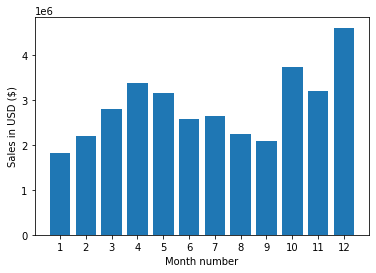

In [60]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.show()

### QUESTION 2: What U.S city had highest number of sales

In [66]:
results2 = all_data.groupby("City").sum()
results2.head(15)

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta(GA),16602,2.779908e+06,2.795499e+06,104794
Austin(TX),11153,1.809874e+06,1.819582e+06,69829
Boston(MA),22528,3.637410e+06,3.661642e+06,141112
Dallas(TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles(CA),33289,5.421435e+06,5.452571e+06,208325
New York City(NY),27932,4.635371e+06,4.664317e+06,175741
Portland(ME),2750,4.471893e+05,4.497583e+05,17144
Portland(OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco(CA),50239,8.211462e+06,8.262204e+06,315520


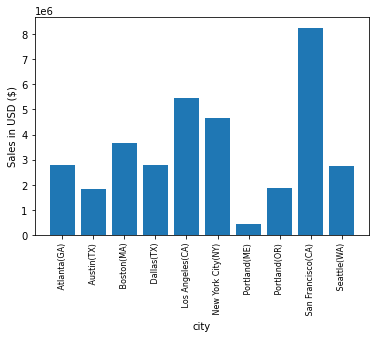

In [72]:
import matplotlib.pyplot as plt
# cities = all_data["City"].unique() #messes up x data doesnt correalate with y data
cities = [city for city ,df in all_data.groupby("City") ]
plt.bar(cities, results2["Sales"])
plt.xticks(cities,rotation="vertical",size = 8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("city")
plt.show()

### Question 3:What time should we display advertisements to maximize likelihood of customer's buying product?

In [74]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,162009,iPhone,1,700.00,700.00,03/28/19 20:59,3,"942 Church St, Austin, TX 73301",Austin(TX)
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,3,"942 Church St, Austin, TX 73301",Austin(TX)
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,3,"942 Church St, Austin, TX 73301",Austin(TX)
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,3,"261 10th St, San Francisco, CA 94016",San Francisco(CA)
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,3,"764 13th St, San Francisco, CA 94016",San Francisco(CA)


In [76]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX)
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX)
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX)
3,162010,Bose SoundSport Headphones,1,99.99,99.99,2019-03-17 05:39:00,3,"261 10th St, San Francisco, CA 94016",San Francisco(CA)
4,162011,34in Ultrawide Monitor,1,379.99,379.99,2019-03-10 00:01:00,3,"764 13th St, San Francisco, CA 94016",San Francisco(CA)


In [79]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
3,162010,Bose SoundSport Headphones,1,99.99,99.99,2019-03-17 05:39:00,3,"261 10th St, San Francisco, CA 94016",San Francisco(CA),5,39
4,162011,34in Ultrawide Monitor,1,379.99,379.99,2019-03-10 00:01:00,3,"764 13th St, San Francisco, CA 94016",San Francisco(CA),0,1


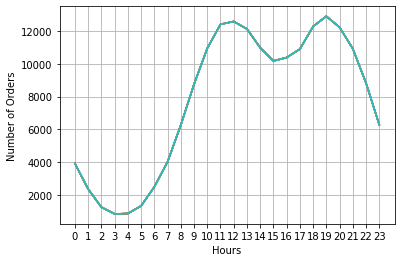

In [87]:
hours = [hour for hour ,df in all_data.groupby("Hour") ]
plt.plot(hours,all_data.groupby(["Hour"]).count())
# all_data.groupby(["Hour"]).count()
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

#### Hence recommended Advertising is around  11A.M and 7 P.M

### Question 4 : What products are most often sold together?

In [88]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
3,162010,Bose SoundSport Headphones,1,99.99,99.99,2019-03-17 05:39:00,3,"261 10th St, San Francisco, CA 94016",San Francisco(CA),5,39
4,162011,34in Ultrawide Monitor,1,379.99,379.99,2019-03-10 00:01:00,3,"764 13th St, San Francisco, CA 94016",San Francisco(CA),0,1


In [98]:
df = all_data[all_data["Order ID"].duplicated(keep = False)]
df["Grouped"] =df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df = df[["Order ID","Grouped"]].drop_duplicates()
df.head(1000)

<ipython-input-98-633952355ac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] =df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"
...,...,...
25964,289055,"Vareebadd Phone,USB-C Charging Cable"
25980,289070,"Bose SoundSport Headphones,Apple Airpods Headp..."
26000,289089,"AA Batteries (4-pack),AAA Batteries (4-pack)"
26029,289117,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [110]:

from itertools import combinations
from collections import Counter
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2))) #change integer 3,4 to change into most common 3 or most common 4
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [111]:
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5:What product sold the most ? why do you think it sold the most?

In [112]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301",Austin(TX),20,59
3,162010,Bose SoundSport Headphones,1,99.99,99.99,2019-03-17 05:39:00,3,"261 10th St, San Francisco, CA 94016",San Francisco(CA),5,39
4,162011,34in Ultrawide Monitor,1,379.99,379.99,2019-03-10 00:01:00,3,"764 13th St, San Francisco, CA 94016",San Francisco(CA),0,1


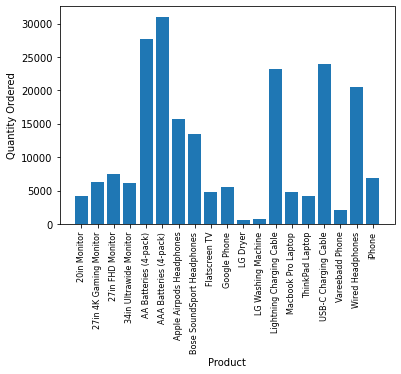

In [120]:
product_group =all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [Product for Product ,df in product_group ]
plt.bar(products, quantity_ordered)
plt.xticks(products,rotation = "vertical",size =8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.show()


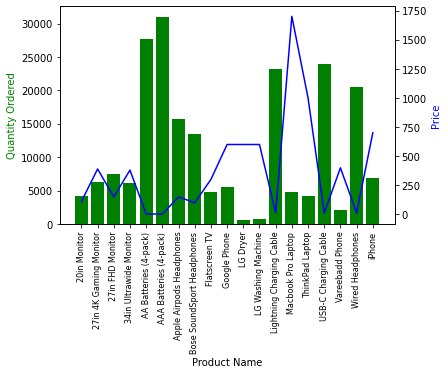

In [132]:
prices = all_data.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color ="g")
ax2.plot(products,prices,"b-")
ax1.set_xticklabels(products,rotation = "vertical",size =8)
ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered",color="g")
ax2.set_ylabel("Price",color="b")
plt.show()